# Ανάλυση Προτύπων 

Εργαστήριο 2

In [260]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import librosa
import numpy as np
from scipy.fftpack import dct, idct

import sklearn as sk
from sklearn.decomposition import PCA

import lib
import importlib

In [160]:
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab2/lib.py'>

### Βήμα 2

In [117]:
fs = 16000 # sampling rate 

In [118]:
wavs, speakers, digits = lib.data_parser("digits/")

### Βήμα 3

In [119]:
hop_time = 0.010 # 10ms
window_time = 0.025 # 25ms

hop_samples = int(hop_time * fs)
window_samples = int(window_time * fs)

In [161]:
mfcc_list = []
for wav in wavs:
    mfcc_list.append(lib.calc_mfcc(wav, hop_samples, window_samples))

In [162]:
# Default axis = -1 chooses columns

deltas = [librosa.feature.delta(mfcc) for mfcc in mfcc_list]
delta_deltas = [librosa.feature.delta(mfcc, order=2) for mfcc in mfcc_list]

### Βήμα 4

In [122]:
n1 = 'six' # 03117169
n2 = 'nine' # 03117089

In [227]:
n1_mfcc_list = [mfcc for mfcc, digit in zip(mfcc_list, digits) if digit == n1]
n2_mfcc_list = [mfcc for mfcc, digit in zip(mfcc_list, digits) if digit == n2]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

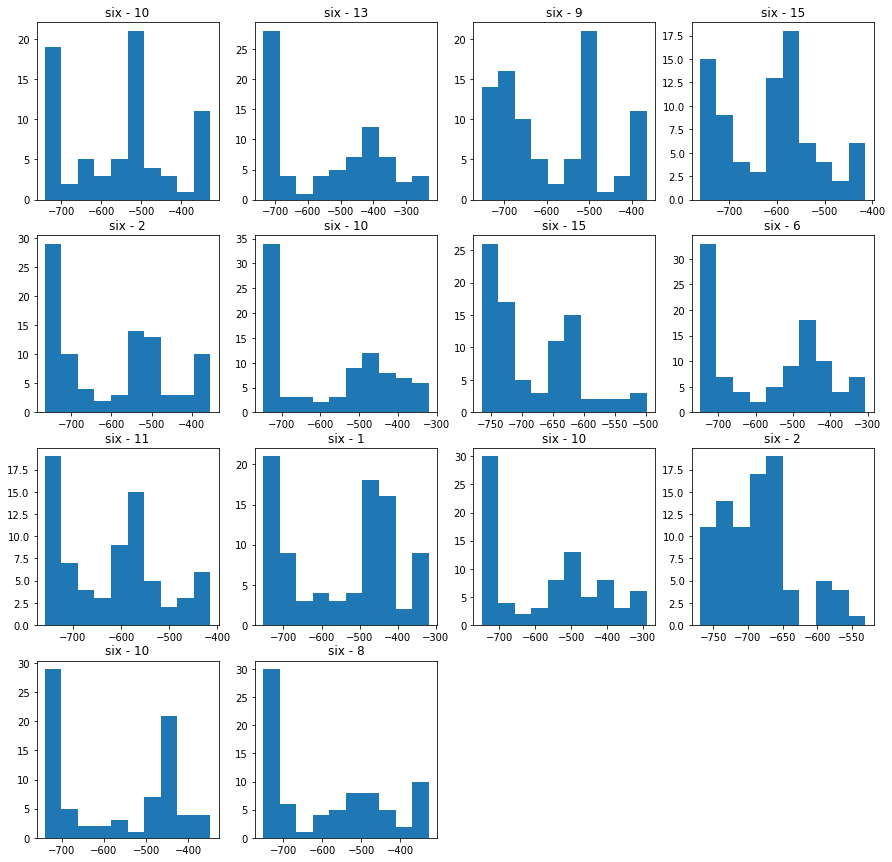

In [238]:
n1_first_feature = [mfcc[0] for mfcc in n1_mfcc_list]

n1_size = len(n1_mfcc_list)
rows = 4
cols = int(n1_size / rows) + 1

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axs = axs.flatten()

for ax in axs:
    ax.set_axis_off()

for x, speaker, ax in zip(n1_first_feature, speakers, axs):
    ax.hist(x)
    ax.set_axis_on()
    ax.set_title(f"{n1} - {speaker}")

plt.show()

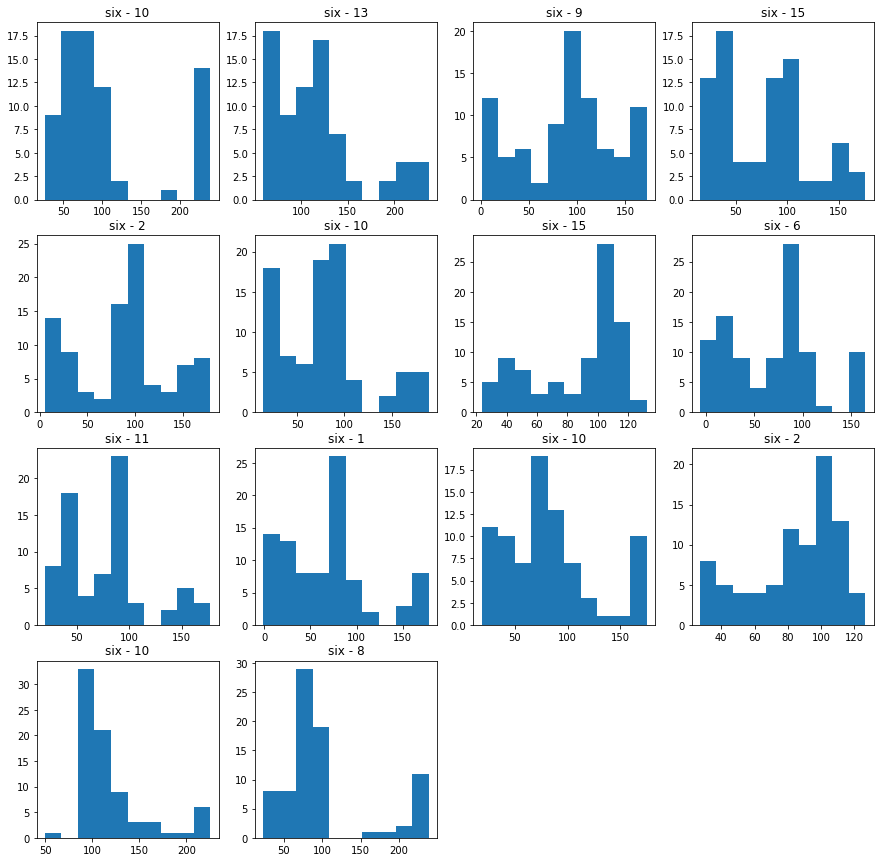

In [239]:
n1_second_feature = [mfcc[1] for mfcc in n1_mfcc_list]

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axs = axs.flatten()

for ax in axs:
    ax.set_axis_off()

for x, speaker, ax in zip(n1_second_feature, speakers, axs):
    ax.hist(x)
    ax.set_axis_on()
    ax.set_title(f"{n1} - {speaker}")

plt.show()

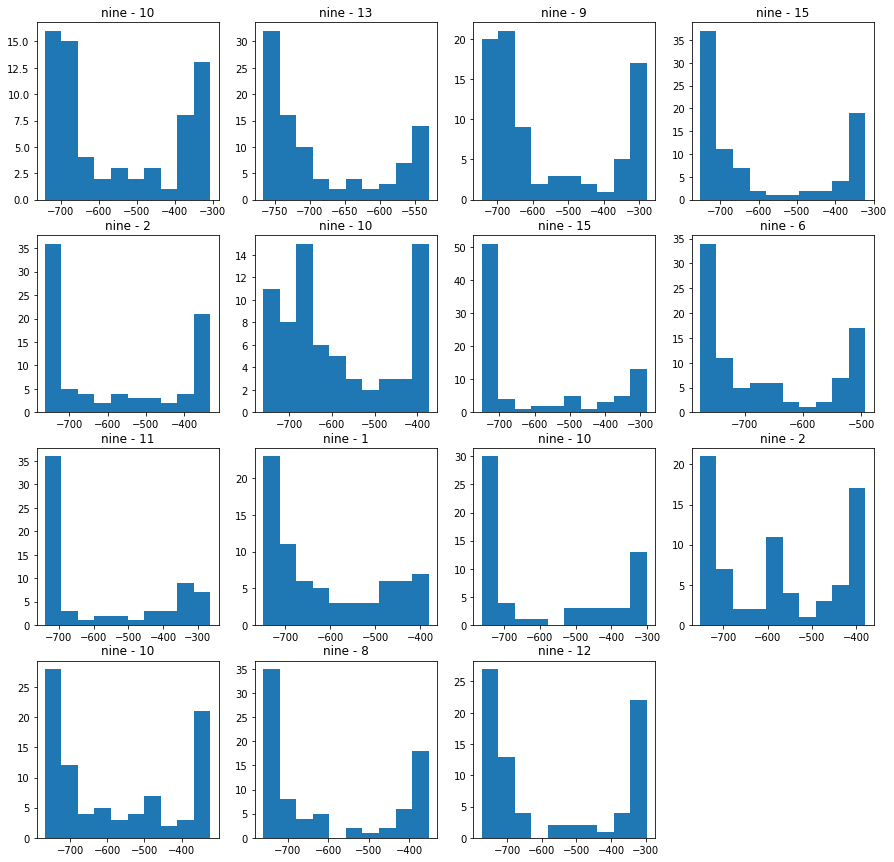

In [240]:
n2_first_feature = [mfcc[0] for mfcc in n2_mfcc_list]

n2_size = len(n2_mfcc_list)
rows = 4
cols = int(n2_size / rows) + 1

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axs = axs.flatten()

for ax in axs:
    ax.set_axis_off()

for x, speaker, ax in zip(n2_first_feature, speakers, axs):
    ax.hist(x)
    ax.set_axis_on()
    ax.set_title(f"{n2} - {speaker}")

plt.show()

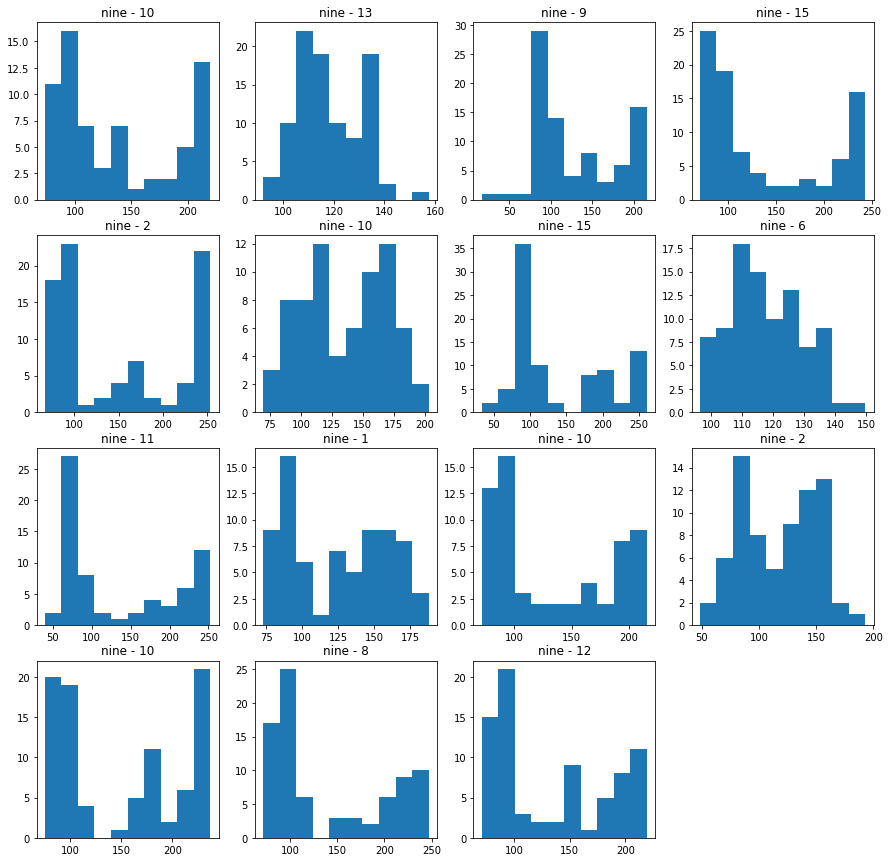

In [241]:
n2_second_feature = [mfcc[1] for mfcc in n2_mfcc_list]

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 15))
axs = axs.flatten()

for ax in axs:
    ax.set_axis_off()

for x, speaker, ax in zip(n2_second_feature, speakers, axs):
    ax.hist(x)
    ax.set_axis_on()
    ax.set_title(f"{n2} - {speaker}")

plt.show()

In [257]:
# Find six1, six2, nine1, nine2
n1_indices = [lib.choose_index(n1, '1', digits, speakers), lib.choose_index(n1, '2', digits, speakers)]
n2_indices = [lib.choose_index(n2, '1', digits, speakers), lib.choose_index(n2, '2', digits, speakers)]

n1_mfscs = []
for i in n1_indices:
    mfcc = lib.calc_mfcc(wavs[i], hop_samples, window_samples)
    n1_mfscs.append(idct(mfcc))
n1_xarr = [np.corrcoef(mfsc) for mfsc in n1_mfscs]

n2_mfscs = []
for i in n2_indices:
    mfcc = lib.calc_mfcc(wavs[i], hop_samples, window_samples)
    n2_mfscs.append(idct(mfcc)) 
n2_xarr = [np.corrcoef(mfsc) for mfsc in n2_mfscs]

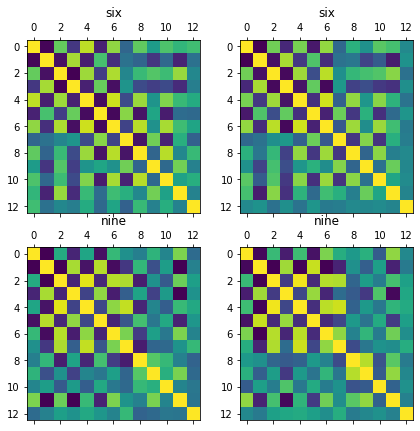

In [258]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
for ax, xarr in zip(axs[0], n1_xarr):
    ax.matshow(xarr)
    ax.set_title(f"{n1}")

for ax, xarr in zip(axs[1], n2_xarr):
    ax.matshow(xarr)
    ax.set_title(f"{n2}")

### Βήμα 5

In [208]:
# Transform digits to list of integers
digits_dict = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9}
digits_int = [digits_dict[digit] for digit in digits]

# Transform speakers to list of integers from 1 to 15
speakers_dict = {'1':1, '2':2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '11':11, '12':12, '13':13, '14':14, '15':15}
speakers_int = [speakers_dict[speaker] for speaker in speakers]

In [218]:
data_mean = [np.array([mfcc.mean(axis=1), delta.mean(axis=1), delta2.mean(axis=1)]).ravel() for mfcc, delta, delta2 in zip(mfcc_list, deltas, delta_deltas)]
data_mean = np.array(data_mean)
print(data_mean.shape)

data_std = [np.array([mfcc.std(axis=1), delta.std(axis=1), delta2.std(axis=1)]).ravel() for mfcc, delta, delta2 in zip(mfcc_list, deltas, delta_deltas)]
data_std = np.array(data_std)
print(data_std.shape)

(133, 39)
(133, 39)


In [276]:
# Assign a color to numbers from 1 to 9
color_dict = {1: 'red', 2: 'green', 3: 'blue', 4: 'yellow', 5: 'orange', 6: 'purple', 7: 'black', 8: 'cyan', 9: 'magenta'}

# Assign a marker to numbers from 1 to 15
marker_dict = {1: 'o', 2: '^', 3: 's', 4: '*', 5: '+', 6: 'x', 7: 'D', 8: 'd', 9: 'h', 10: 'p', 11: 'v', 12: '<', 13: '>', 14: '8', 15: '1'}

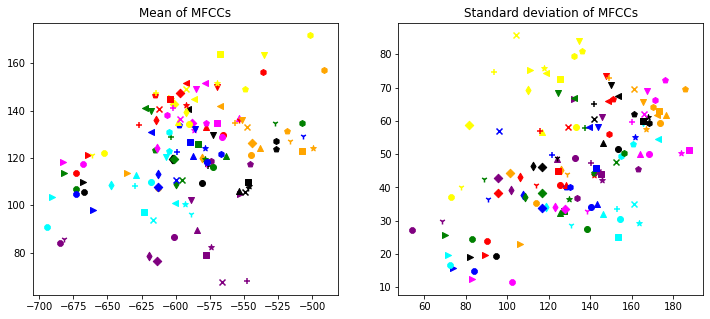

In [277]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for d, s, mean, std in zip(digits_int, speakers_int, data_mean, data_std):
    ax0.scatter([mean[0]], [mean[1]], c=color_dict[d], marker=marker_dict[s])
    ax0.set_title(f"Mean of MFCCs")

    ax1.scatter([std[0]], [std[1]], c=color_dict[d], marker=marker_dict[s])
    ax1.set_title(f"Standard deviation of MFCCs")

plt.show()

### Βήμα 6

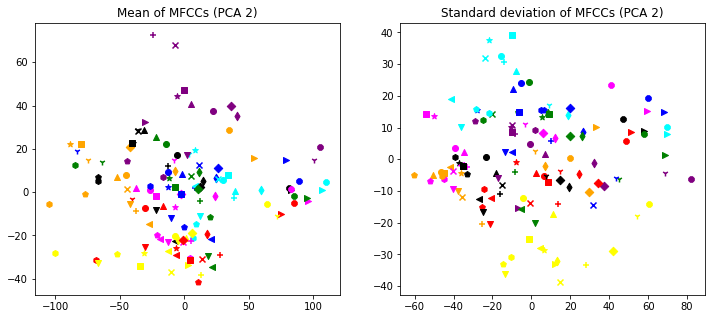

In [275]:
# Apply PCA to the data
pca_2 = PCA(n_components=2)
data_mean_pca_2 = pca_2.fit_transform(data_mean)
data_std_pca_2 = pca_2.fit_transform(data_std)

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

for d, s, mean, std in zip(digits_int, speakers_int, data_mean_pca_2, data_std_pca_2):
    ax0.scatter([mean[0]], [mean[1]], c=color_dict[d], marker=marker_dict[s])
    ax0.set_title(f"Mean of MFCCs (PCA 2)")

    ax1.scatter([std[0]], [std[1]], c=color_dict[d], marker=marker_dict[s])
    ax1.set_title(f"Standard deviation of MFCCs (PCA 2)")

plt.show()

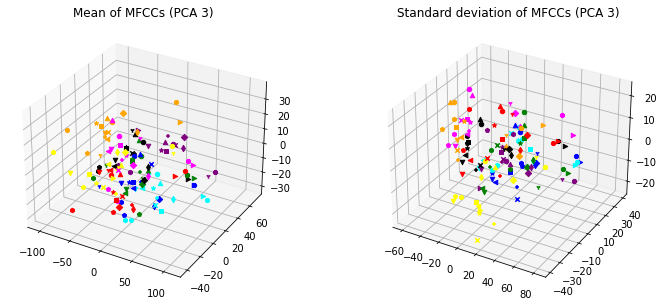

In [283]:
# Apply PCA to the data
pca_3 = PCA(n_components=3)
data_mean_pca_3 = pca_3.fit_transform(data_mean)
data_std_pca_3 = pca_3.fit_transform(data_std)

fig = plt.figure(figsize=(12, 5))
#fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax0 = fig.add_subplot(1, 2, 1, projection='3d')
ax1 = fig.add_subplot(1, 2, 2, projection='3d')

for d, s, mean, std in zip(digits_int, speakers_int, data_mean_pca_3, data_std_pca_3):
    ax0.scatter([mean[0]], [mean[1]], [mean[2]], c=color_dict[d], marker=marker_dict[s])
    ax0.set_title(f"Mean of MFCCs (PCA 3)")

    ax1.scatter([std[0]], [std[1]], [std[2]], c=color_dict[d], marker=marker_dict[s])
    ax1.set_title(f"Standard deviation of MFCCs (PCA 3)")

plt.show()

In [295]:
print(f"The remaining variance of 2 PCA components is {sum(pca_2.explained_variance_ratio_) * 100:.4f}%")
print(f"The remaining variance of 3 PCA components is {sum(pca_3.explained_variance_ratio_) * 100:.4f}%")

The remaining variance of 2 PCA components is 83.9019%
The remaining variance of 3 PCA components is 90.7052%
